In [4]:
# 볼록/오몬 렌즈 왜곡 효과 (remap_lens.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image


def distortion(img):
  rows, cols = img.shape[:2]

  # ---① 설정 값 셋팅
  exp = 1.5    # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
  scale = 1.6        # 변환 영역 크기 (0 ~ 1)

  # 매핑 배열 생성 ---②
  mapy, mapx = np.indices((rows, cols),dtype=np.float32)

  # 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
  mapx = 2*mapx/(cols-1)-1
  mapy = 2*mapy/(rows-1)-1

  # 직교좌표를 극 좌표로 변환 ---④
  r, theta = cv2.cartToPolar(mapx, mapy)

  # 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
  r[r< scale] = r[r<scale] **exp

  # 극 좌표를 직교좌표로 변환 ---⑥
  mapx, mapy = cv2.polarToCart(r, theta)

  # 중심점 기준에서 좌상단 기준으로 변경 ---⑦
  mapx = ((mapx + 1)*cols-1)/2
  mapy = ((mapy + 1)*rows-1)/2
  # 재매핑 변환
  distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
  return distorted

In [8]:
# train image 변환
original_data_root = '/home/user/ai_test/data/train_source_image'
distorted_data_root = '/home/user/ai_test/data/distorted_train_source_image'

for filename in tqdm(os.listdir(original_data_root)):
    if filename.endswith((".png")):
        input_path = os.path.join(original_data_root, filename)
        output_path = os.path.join(distorted_data_root, filename)
        
        image = cv2.imread(input_path)
        transformed_image = distortion(image)
        cv2.imwrite(output_path, transformed_image)

100%|██████████| 2194/2194 [05:58<00:00,  6.12it/s]


In [9]:
# train image의 마스크 변환
original_data_root = '/home/user/ai_test/data/train_source_gt'
distorted_data_root = '/home/user/ai_test/data/distorted_train_source_gt'

for filename in tqdm(os.listdir(original_data_root)):
    if filename.endswith((".png")):
        input_path = os.path.join(original_data_root, filename)
        output_path = os.path.join(distorted_data_root, filename)
        
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        transformed_image = distortion(image)
        cv2.imwrite(output_path, transformed_image)

100%|██████████| 2194/2194 [02:25<00:00, 15.04it/s]


/tmp/ipykernel_42369/1926576561.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_colors = plt.cm.get_cmap('tab20', 13)  # 12가지 색상과 1가지 회색(255)


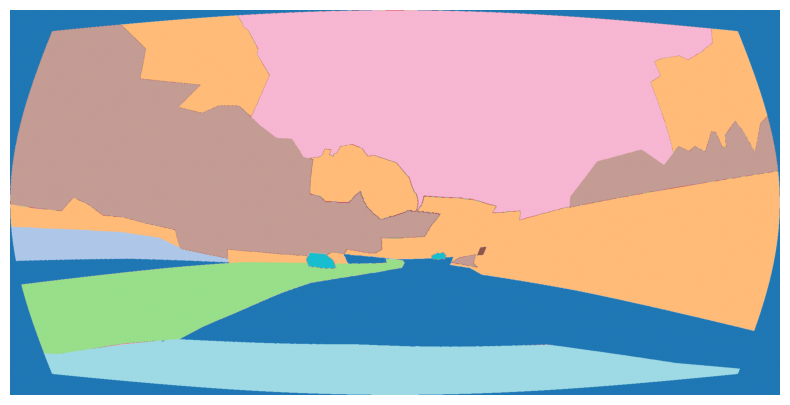

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask_path = './data/distorted_train_source_gt/TRAIN_SOURCE_0000.png'
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# 이미지 크기 설정
image_height = 1024
image_width = 2048

# 픽셀 값을 포함한 색상 맵 생성
cmap_colors = plt.cm.get_cmap('tab20', 13)  # 12가지 색상과 1가지 회색(255)

# 픽셀 값을 색상으로 변환
colored_image = cmap_colors(mask)

# 이미지 그리기
plt.figure(figsize=(10, 5))  # 이미지 크기에 맞게 figure 크기 설정
plt.imshow(colored_image)
plt.axis('off')  # 축 제거
plt.show()


In [42]:
from glob import glob
file_path = glob("./data/distorted_train_source_gt/*")

mask = cv2.imread(file_path[0])
mask.shape

(1024, 2048, 3)